In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

# Show datasets

In [2]:
n_samples = 1000
#firse dataset
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
#second dataset
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
#third dataset
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
#forth dataset
random_state = 170
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
#fifth dataset
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
#sixth dataset
no_structure = np.random.rand(n_samples, 2), None 


In [3]:
def cluster_image(X,y,plot_num):
    plt.subplot(2, 3, plot_num)
    #colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a', 
#                                          '#f781bf', '#a65628', '#984ea3',
#                                          '#999999', '#e41a1c', '#dede00']),
#                                         int(max(y) + 1))))
    #plt.scatter(X[:, 0], X[:, 1],s=10, color=colors[y])
    plt.scatter(X[:, 0], X[:, 1],s=10)

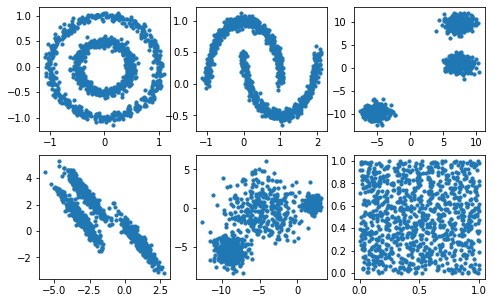

In [4]:
plot_num=0
plt.figure(figsize=(8, 5))
for a in [noisy_circles,noisy_moons,blobs,aniso,varied,no_structure]:
    plot_num+=1
    X, y = a
    cluster_image(X,y,plot_num)

# Algorithm CENTREx

In [16]:
#initialization
Y,cluser=blobs
a,b=Y.shape
d=100
N=int(a/d)
Y_n=[Y[i:i + d] for i in range(0, len(Y), d)]

epsilon_e=0.001
epsilon_f=0.5
alpha=0.001
delta_n=np.random.rand(N)
L=100
lemda_n=1/delta_n

In [7]:
len(Y_n)

10

In [8]:
lemda_n

array([5.32807807, 1.2529582 , 1.59618842, 1.50631047, 1.2184074 ,
       1.92551948, 1.22021286, 1.26736654, 2.92797682, 1.52515031])

In [70]:
C=np.random.rand(d,d)
C_vals,C_vecs = np.linalg.eig(C)
np.diag(C_vals)
# whitening matrix of C
psi=(np.diag(C_vals**(-1/2)))*C_vecs
#weight
w=

In [ ]:
def H_init()

In [ ]:
def H(phi,lemda_n,psi,Y_n):
    sum1=0
    sum2=0
    for i in range(0,N):
        a=(lemda_n[i]**2)*w*((lemda_n[i]**2)*(np.linalg.norm(psi*(Y_n[i]-phi)))**2)*Y_n[i]
        sum1+=a
    for j in range(0,N):
        b=(lemda_n[j]**2)*w*((lemda_n[j]**2)*(np.linalg.norm(psi*(Y_n[j]-phi)))**2)
        sum2+=b
    return a/b
    
    
    
    

In [48]:
def CRNTREx(Y_n,lemda_n,epsilon_e=epsilon_e,L=L,alpha=alpha,N=N):
    #initialization
    l=[]
    u=list(range(0,N))
    #centroid estimation
    while u != []:
        print(u)
        #pick
        if len(u)==1:
            i=0
        else:
            i=np.random.randint(0,len(u)-1)
        n=u[i]
        #print(i,n)
        #estimate
        phi=[]
        phi[0]=Y_n[n]
        phi[1]=H_init(phi[0])
        l=1
        u.pop(i)
        

In [49]:
CRNTREx(Y_n,lemda_n,epsilon_e=epsilon_e,L=L,alpha=alpha,N=N)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0 0
[1, 2, 3, 4, 5, 6, 7, 8, 9]
0 1
[2, 3, 4, 5, 6, 7, 8, 9]
2 4
[2, 3, 5, 6, 7, 8, 9]
5 8
[2, 3, 5, 6, 7, 9]
1 3
[2, 5, 6, 7, 9]
1 5
[2, 6, 7, 9]
0 2
[6, 7, 9]
0 6
[7, 9]
0 7
[9]
0 9
